AR(1)

$\Large a_t = \phi a_{t-1} + \varepsilon_t$

ARMA(1,1)

$\Large a_t = \beta a_{t-1} + \phi \varepsilon_{t-1}+ \varepsilon_t$

ARCH(1)

$\Large a_t = \varepsilon_t \sqrt{\alpha + \alpha_1 a_{t-1}^2}$
$\Large  = \varepsilon_t \sigma_t$

GARCH(1,1)

$\Large a_t = \varepsilon_t \sqrt{\alpha + \alpha_1 a_{t-1}^2 + + \beta_1 \sigma_{t-1}^2}$
$\Large  = \varepsilon_t \sigma_t$

In [79]:
#!pip install arch

In [80]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARCH(2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [81]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 )
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

In [82]:
gauss(0,1)

1.0062577310853666

Text(0.5, 1.0, 'Simulated ARCH(2) Data')

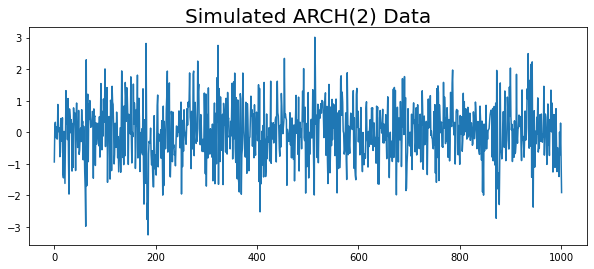

In [83]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated ARCH(2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

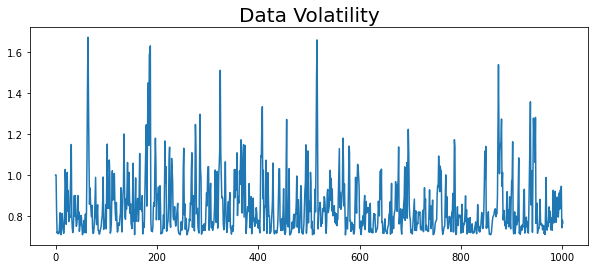

In [84]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

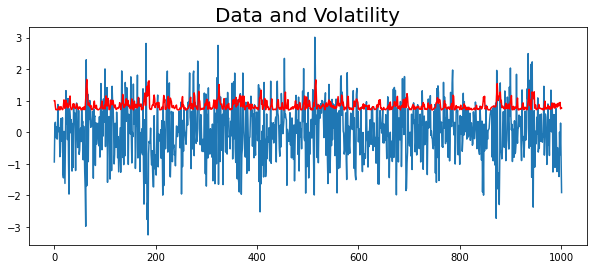

In [85]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF Plot

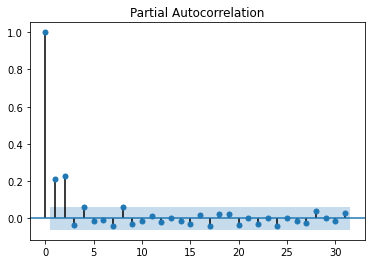

In [87]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the ARCH Model

In [88]:
train, test = series[:-test_size], series[-test_size:]

In [89]:
model = arch_model(train, p=2, q=0)

In [90]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1163.7643304658259
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1153.2197471719096
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1143.305975305153
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1138.8930753252212
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1135.8454940249353
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1134.9183205337931
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1134.0816065942604
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1133.9346158281319
Iteration:      9,   Func. Count:     64,   Neg. LLF: 1133.9157876132517
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1133.9157013146548
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1133.9157005989148
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


In [91]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1133.92
Distribution:                  Normal   AIC:                           2275.83
Method:            Maximum Likelihood   BIC:                           2295.05
                                        No. Observations:                  902
Date:                Fri, Mar 05 2021   Df Residuals:                      901
Time:                        06:15:04   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0158  2.593e-02      0.608      0.543 [-3.506e-02,6.658e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4588  4.298e-02     10.676  1.324e-26   [  0.375,  0.543]
alpha[1]       0.1689  4.592e-02      3.679  2.342e-04 [7.894e-02,  0.259]
alpha[2]       0.2504  5.067e-02      4.942  7.738e-07   [  0.151,  0.350]
==========================================================================

Covariance estimator: robust
"""

## Predict

In [92]:
predictions = model_fit.forecast(horizon=test_size)

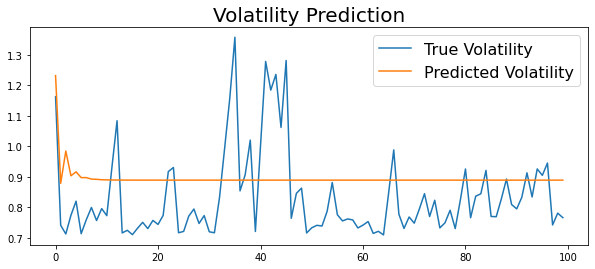

In [93]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

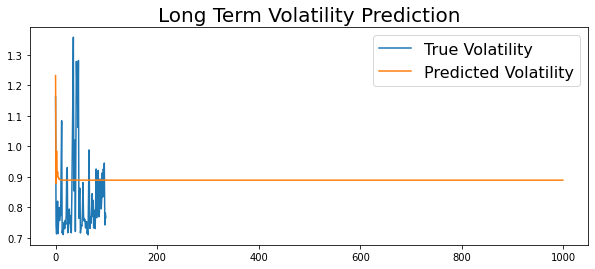

In [94]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [95]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

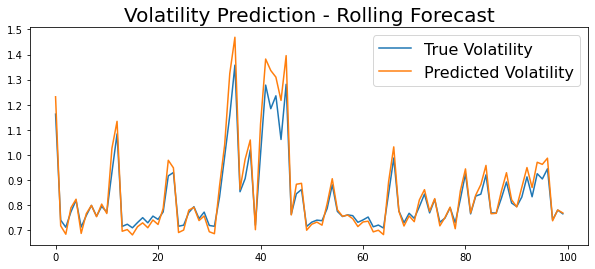

In [96]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [97]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

In [98]:
gauss(0,1)

-0.37203778984174307

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

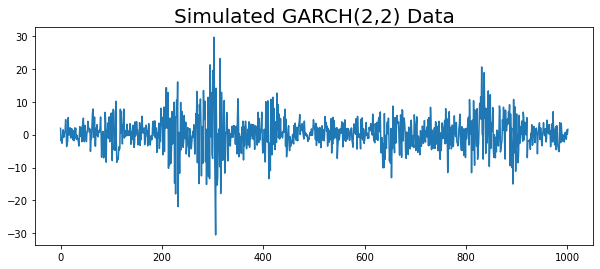

In [99]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

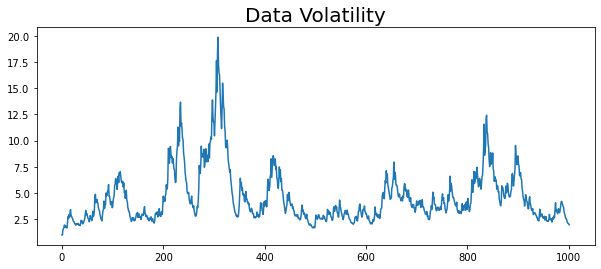

In [100]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

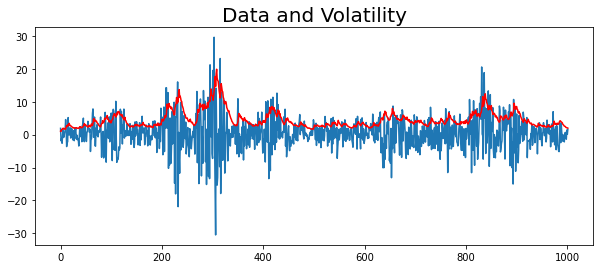

In [101]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

## PACF Plot

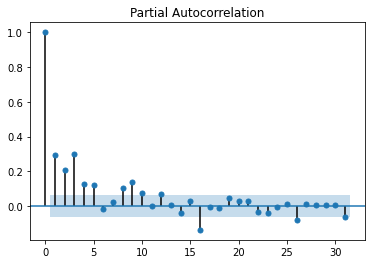

In [103]:
plot_pacf(np.array(series)**2)
plt.show()

## Fit the GARCH Model

In [104]:
train, test = series[:-test_size], series[-test_size:]

In [105]:
model = arch_model(train, p=2, q=2)

In [106]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2571.661833875022
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2565.8000300594617
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2563.9621321766217
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2563.770202281522
Iteration:      5,   Func. Count:     46,   Neg. LLF: 2563.753826461073
Iteration:      6,   Func. Count:     55,   Neg. LLF: 2563.275141465853
Iteration:      7,   Func. Count:     64,   Neg. LLF: 2562.797815391763
Iteration:      8,   Func. Count:     73,   Neg. LLF: 2562.591133146688
Iteration:      9,   Func. Count:     81,   Neg. LLF: 2562.563508444284
Iteration:     10,   Func. Count:     90,   Neg. LLF: 2562.5355318037264
Iteration:     11,   Func. Count:     98,   Neg. LLF: 2562.5074664712183
Iteration:     12,   Func. Count:    106,   Neg. LLF: 2562.500884739827
Iteration:     13,   Func. Count:    114,   Neg. LLF: 2562.5007591309395
Iteration:     14,   Func. Count:    122,   Neg. LLF: 2562.

In [107]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2562.50
Distribution:                  Normal   AIC:                           5137.00
Method:            Maximum Likelihood   BIC:                           5165.83
                                        No. Observations:                  902
Date:                Fri, Mar 05 2021   Df Residuals:                      901
Time:                        06:15:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3181      0.106      2.990  2.788e-03 [  0.110,  0.527]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0097      0.297      3.404  6.649e-04    [  0.428,  1.591]
alpha[1]       0.1069  3.475e-02      3.075  2.102e-03  [3.876e-02,  0.175]
alpha[2]       0.2794  4.623e-02      6.043  1.514e-09    [  0.189,  0.370]
beta[1]        0.1579  9.424e-02      1.675  9.385e-02 [-2.681e-02,  0.343]
beta[2]        0.4375  7.818e-02      5.596  2.198e-08    [  0.284,  0.591]
===========================================================================

Covariance estimator: robust
"""

## Predict

In [108]:
predictions = model_fit.forecast(horizon=test_size)

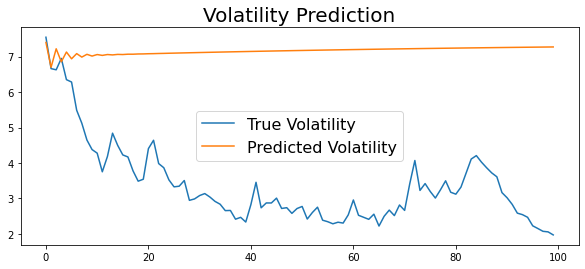

In [109]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

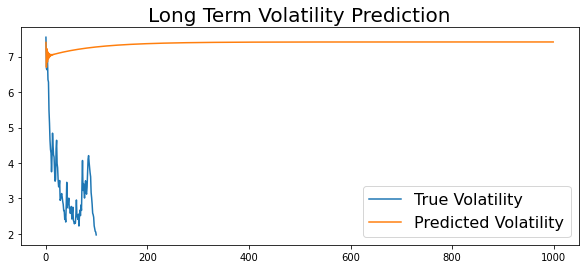

In [110]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [111]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

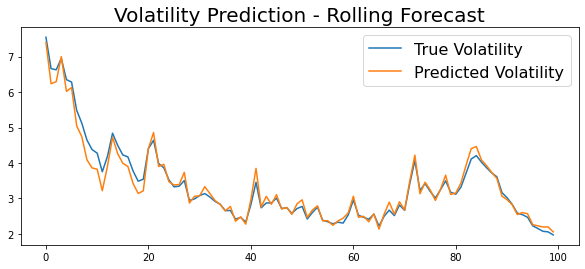

In [112]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)